<a href="https://colab.research.google.com/github/Nawshin-25/Saint_Martin/blob/main/Station_SED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import seaborn as sns

In [ ]:
file_name = '/content/drive/MyDrive/Data/Heavy Metals Saint Martin.xlsx'
Station_Sed_df = pd.read_excel(file_name, sheet_name='Station (Sediment)')
Station_Sed_df_cleaned = Station_Sed_df.dropna()

In [ ]:
per_row = Station_Sed_df_cleaned.loc[Station_Sed_df_cleaned['Indices'] == 'Potential Ecological Risk (PER)']
per_values = per_row.iloc[0, 1:-1].astype(float)

In [ ]:
mean_value = per_values.mean()
median_value = per_values.median()
min_value = per_values.min()
max_value = per_values.max()
q1 = per_values.quantile(0.25)
q3 = per_values.quantile(0.75)
data_range = max_value - min_value

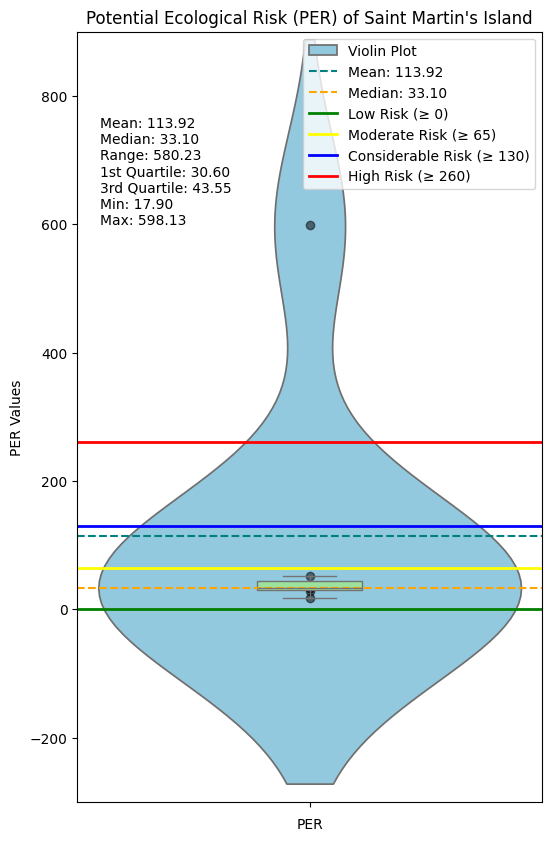

In [ ]:
plt.figure(figsize=(6, 10))
sns.violinplot(data=per_values, inner=None, color='skyblue', label='Violin Plot')
sns.boxplot(data=per_values, color='lightgreen', fliersize=0, width=0.2)
plt.scatter([0]*len(per_values), per_values, color='black', alpha=0.5)

plt.axhline(mean_value, color='teal', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axhline(median_value, color='orange', linestyle='--', label=f'Median: {median_value:.2f}')

contamination_levels = {
    'Low Risk': (0, 65, 'green'),
    'Moderate Risk': (65, 130, 'yellow'),
    'Considerable Risk': (130, 260, 'blue'),
    'High Risk': (260, np.inf, 'red')
}

for label, (lower, upper, color) in contamination_levels.items():
    plt.axhline(lower, color=color, linestyle='-', linewidth=2.0, label=f'{label} (≥ {lower})')

plt.ylim(-300, 900)
plt.title("Potential Ecological Risk (PER) of Saint Martin's Island")
plt.ylabel("PER Values")
plt.xlabel("PER")

# Display statistics
stats_text = (f"Mean: {mean_value:.2f}\n"
              f"Median: {median_value:.2f}\n"
              f"Range: {data_range:.2f}\n"
              f"1st Quartile: {q1:.2f}\n"
              f"3rd Quartile: {q3:.2f}\n"
              f"Min: {min_value:.2f}\n"
              f"Max: {max_value:.2f}")
plt.text(0.05, 0.75, stats_text, ha='left', va='baseline', transform=plt.gca().transAxes)

# Show legend
plt.legend()
plt.show()

In [ ]:
tri_row = Station_Sed_df_cleaned.loc[Station_Sed_df_cleaned['Indices'] == "Toxicity Risk Index (TRI)"]
tri_values = tri_row.iloc[0, 1:-1].astype(float)
mean_value = tri_values.mean()
median_value = tri_values.median()
min_value = tri_values.min()
max_value = tri_values.max()
q1 = tri_values.quantile(0.25)
q3 = tri_values.quantile(0.75)
data_range = max_value - min_value

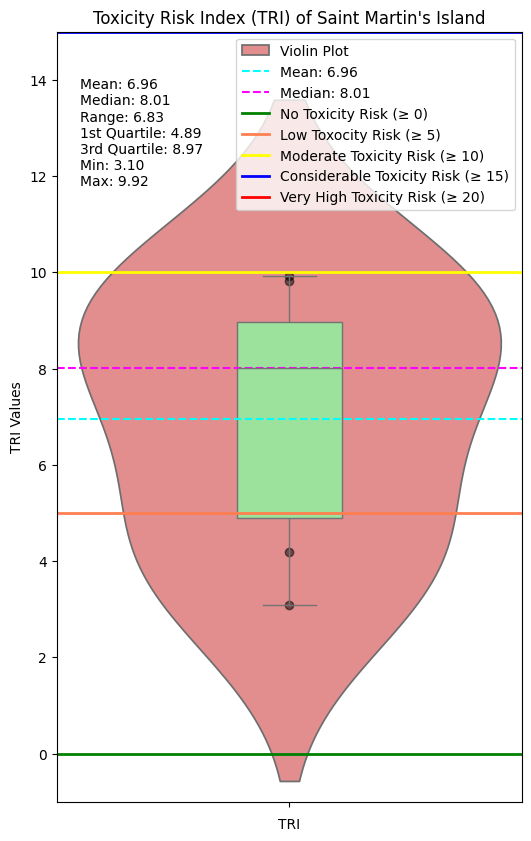

In [ ]:
plt.figure(figsize=(6, 10))
sns.violinplot(data=tri_values, inner=None, color='lightcoral', label='Violin Plot')
sns.boxplot(data=tri_values, color='lightgreen', fliersize=0, width=0.2)
plt.scatter([0]*len(tri_values), tri_values, color='black', alpha=0.5)

plt.axhline(mean_value, color='cyan', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axhline(median_value, color='magenta', linestyle='--', label=f'Median: {median_value:.2f}')

contamination_levels = {
    'No Toxicity Risk': (0, 5, 'green'),
    'Low Toxocity Risk': (5, 10, 'coral'),
    'Moderate Toxicity Risk': (10, 15, 'yellow'),
    'Considerable Toxicity Risk': (15, 20, 'blue'),
    'Very High Toxicity Risk': (20, np.inf, 'red')
}

for label, (lower, upper, color) in contamination_levels.items():
    plt.axhline(lower, color=color, linestyle='-', linewidth=2.0, label=f'{label} (≥ {lower})')

plt.ylim(-1, 15)
plt.title("Toxicity Risk Index (TRI) of Saint Martin's Island")
plt.ylabel("TRI Values")
plt.xlabel("TRI")

# Display statistics
stats_text = (f"Mean: {mean_value:.2f}\n"
              f"Median: {median_value:.2f}\n"
              f"Range: {data_range:.2f}\n"
              f"1st Quartile: {q1:.2f}\n"
              f"3rd Quartile: {q3:.2f}\n"
              f"Min: {min_value:.2f}\n"
              f"Max: {max_value:.2f}")
plt.text(0.05, 0.8, stats_text, ha='left', va='baseline', transform=plt.gca().transAxes)

# Show legend
plt.legend()
plt.show()